In [1]:
import numpy as np
#load data from file 导入txt数据
def load_data(filename):
    dataset = []
    label = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        dataset.append(lineArr[0:2])
        label.append(lineArr[-1])    
    return np.array(dataset,dtype=np.float64), np.array(label,dtype=np.int).reshape(-1,1)

(100, 2) (100, 1)
[-0.017613 14.053064] [0]


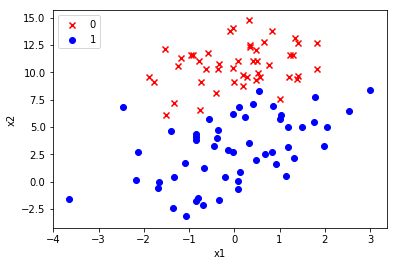

In [3]:
import matplotlib.pyplot as plt
#导入数据并且可视化一下
x,y = load_data("./testSet.txt")
print(x.shape,y.shape)
print(x[0],y[0])

label1 = np.where(y.ravel() == 0)
plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = '0')
label2 = np.where(y.ravel() == 1)
plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = '1')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'upper left')
plt.show()

In [4]:
#使用batch gradient descent求得最佳参数

def sigmoid(x):
    return 1.0 / (1+np.exp(-x))
#每次使用全部的数据集去更新一次参数
def bgd(x,y,learn_rate = 0.001,iters=1000):
    m,n = x.shape
    weight = np.zeros((n,1)) #初始化为0，是可以的,书上是全部为1
    weights = np.zeros((iters,n)) #记录每次weight的变化
    
    for i in range(iters):
        out = sigmoid(x.dot(weight))
        error = y - out
        dw = -x.T.dot(error)
        weight += -learn_rate*dw
        weights[i,:] = weight.ravel().T
    
    return weight,weights

(100, 3)
[[ 5.30867192]
 [ 0.57605434]
 [-0.76684822]]
(1000, 3)


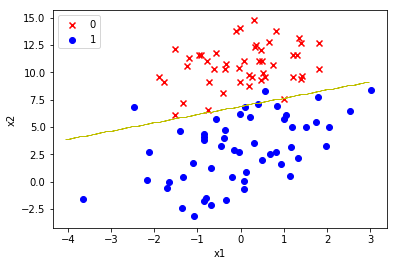

In [5]:
#现在我们测试一下
#首先对x加上x0 =1
m,n = x.shape
X = np.hstack((np.ones((m,1)),x))
print(X.shape)

weight,weights = bgd(X,y)
print(weight)
print(weights.shape)

#并且可视化一下最佳参数的效果
label1 = np.where(y.ravel() == 0)
plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = '0')
label2 = np.where(y.ravel() == 1)
plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = '1')
xx = np.arange(-4.0,3.0,0.1)
yy = (-weight[0] - weight[1]*xx) / weight[2]
plt.plot(xx,yy,"y_")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'upper left')
plt.show()

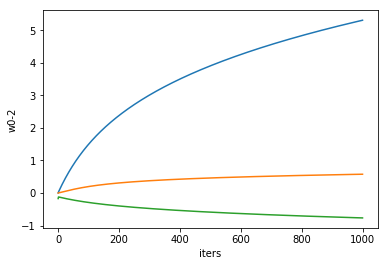

In [6]:
#来看看参数weight的随着迭代次数的收敛情况
plt.plot(weights)
plt.ylabel("w0-2")
plt.xlabel("iters")
plt.show()

In [7]:
#使用随机梯度下降法更新权重系数
def sgd(x,y,learn_rate = 0.01,iters = 200):
    m,n = x.shape
    weight = np.zeros((n,1))
    weight0 = []
    weight1 = []
    weight2 = []
    for i in range(iters):
        for j in range(m):
            #每次选取一个样本更新weight,书上是随机选取一个，而不是按照顺序（消除周期性的波动，而是随机的波动）
            #书上还有学习率随迭代次数下降,不过我觉得没有必要,因为模型和数据简单，而且下降的方法不通用
            out = sigmoid(x[j,:].reshape(1,-1).dot(weight))
            error = y[j,:].reshape(1,-1) - out
            dw = -x[j,:].reshape(1,-1).T.dot(error)
            weight += -learn_rate*dw
            weight0.append(weight[0,0])
            weight1.append(weight[1,0])
            weight2.append(weight[2,0])
    return weight,weight0,weight1,weight2

[[ 7.03803009]
 [ 0.71084578]
 [-1.0395157 ]]


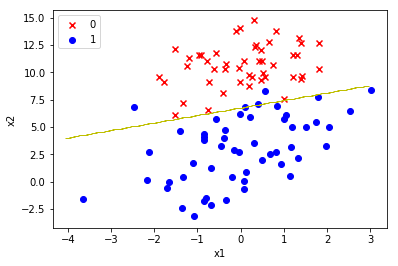

In [8]:
weights,weight0,weight1,weight2 = sgd(X,y)
print(weights)

#并且可视化一下最佳参数的效果
label1 = np.where(y.ravel() == 0)
plt.scatter(x[label1,0],x[label1,1],marker='x',color = 'r',label = '0')
label2 = np.where(y.ravel() == 1)
plt.scatter(x[label2,0],x[label2,1],marker='o',color = 'b',label = '1')
xx = np.arange(-4.0,3.0,0.1)
yy = (-weights[0] - weights[1]*xx) / weights[2]
plt.plot(xx,yy,"y_")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'upper left')
plt.show()

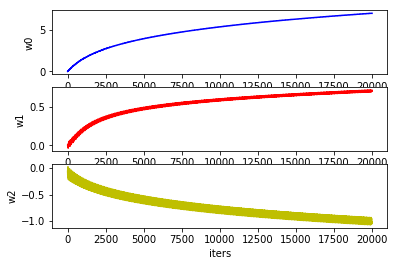

In [9]:
#来看看参数weight的随着迭代次数的收敛情况,可以看到有上下波动的情况，但是整体还是逐渐收敛的
plt.subplot(311)
plt.plot(weight0,"b")
plt.ylabel("w0")

plt.subplot(312)
plt.plot(weight1,"r")
plt.ylabel("w1")

plt.subplot(313)
plt.plot(weight2,"y")
plt.ylabel("w2")
plt.xlabel("iters")
plt.show()

In [10]:
#最后补一个预测函数
def predict(x,weight):
    m = x.shape[0]
    x = np.hstack((np.ones((m,1)),x)) #添加x0 = 1
    out = sigmoid(x.dot(weight))
    pred = np.where(out>0.5,1,0)
    return pred

input = np.array([[-0.01,14.0],[-1.3,4.6]])
pred = predict(input,weight)
print("should be 0 and 1")
print(pred)


should be 0 and 1
[[0]
 [1]]
